In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# I. Acquisition

### 1) Use a python module containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
import pandas as pd
import numpy as np
from pydataset import data
df_iris = data('iris')
type(df_iris)

pandas.core.frame.DataFrame

- print the first 3 rows


In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)


In [4]:
df_iris.shape

(150, 5)

- print the column names


In [5]:
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

- print the data type of each column


In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?


In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2) Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel



In [8]:
df_excel = pd.read_excel('~/Documents/codeup/Dominic Pedrotti - Excel_Exercises.xlsx', sheet_name= 0 )
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes


- assign the first 100 rows to a new dataframe, df_excel_sample


In [9]:
df_excel_sample = df_excel[:100]

- print the number of rows of your original dataframe

In [10]:
df_excel.shape[0]

7049

- print the first 5 column names


In [11]:
df_excel.columns.tolist()[0:5]

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

- print the column names that have a data type of object


In [12]:
df_excel.select_dtypes(object).columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

- compute the range for each of the numeric variables.


In [13]:
df_excel.select_dtypes([float, int]).max()- df_excel.select_dtypes([float, int]).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

### 3) Read the data from this google sheet into a dataframe, df_google
- print the first 3 rows



In [14]:
df_google = pd.read_clipboard()
df_google.head(3)

,acq.get_iris_data()


- print the number of rows and columns

In [15]:
df_google.shape

(0, 1)

- print the column names


In [16]:
df_google.columns.tolist()

['acq.get_iris_data()']

- print the data type of each column


In [17]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
acq.get_iris_data()    0 non-null object
dtypes: object(1)
memory usage: 0.0+ bytes


- print the summary statistics for each of the numeric variables


In [18]:
df_google.describe()

,acq.get_iris_data()
count,0
unique,0


- print the unique values for each of your categorical variables


In [19]:
catgoricals = df_google.select_dtypes(object).columns.tolist()
for i in catgoricals:
    print (i, '\n*************************************************\n', df_google[i].unique())

acq.get_iris_data() 
*************************************************
 []


In [20]:
import acquire as acq
titan = acq.get_titanic_data()
titan.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [21]:
iris = acq.get_iris_data()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
species_id        150 non-null int64
measurement_id    150 non-null int64
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_name      150 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


# II. Preparation

### 1) Iris data
- Drop the species_id and measurement_id columns.

In [22]:
clean_iris = iris.drop('species_id', axis = 1).drop('measurement_id', axis = 1)

- Rename the species_name column to just species.


In [23]:
clean_iris.rename(columns = {'species_name':'species'}, inplace=True)

- Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder_spec = LabelEncoder().fit(clean_iris.species)
encoded_species = encoder_spec.transform(clean_iris.species)
encoded_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- test function to do it all

In [25]:
from prepare import prep_iris
prep_iris(acq.get_iris_data()).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2) Titanic Data

- Use the function you defined in acquire.py to load the titanic data set.

In [26]:
titan = acq.get_titanic_data()
titan.info()
titan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


- Handle the missing values in the embark_town and embarked columns.

In [27]:
clean_titan=titan[ ~titan.embarked.isnull()]

- Remove the deck column.

In [28]:
clean_titan.drop('deck', axis = 1, inplace= True)

- Use a label encoder to transform the embarked column.

In [29]:
encoder = LabelEncoder().fit(clean_titan.embarked)
clean_titan.embarked = encoder.transform(clean_titan.embarked)

- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(clean_titan[['age', 'fare']])
clean_titan[['age', 'fare']] = scaler.transform(clean_titan[['age', 'fare']])
clean_titan.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,0.271174,1,0,0.014151,2,Third,Southampton,0
1,1,1,1,female,0.472229,1,0,0.139136,0,First,Cherbourg,0
2,2,1,3,female,0.321438,0,0,0.015469,2,Third,Southampton,1
3,3,1,1,female,0.434531,1,0,0.103644,2,First,Southampton,0
4,4,0,3,male,0.434531,0,0,0.015713,2,Third,Southampton,1


- change Nones to np.nans

In [31]:
clean_titan = clean_titan.where((pd.notnull(clean_titan)), np.nan)

- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [32]:
from prepare import prep_titanic
titanic = prep_titanic(acq.get_titanic_data())
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,0.271174,1,0,0.014151,2,Third,Southampton,0
1,1,1,1,female,0.472229,1,0,0.139136,0,First,Cherbourg,0
2,2,1,3,female,0.321438,0,0,0.015469,2,Third,Southampton,1
3,3,1,1,female,0.434531,1,0,0.103644,2,First,Southampton,0
4,4,0,3,male,0.434531,0,0,0.015713,2,Third,Southampton,1


# III. Explotatory Analysis

- split data

In [33]:
import split_scale as ss
train, test = ss.split_my_data(titanic)

### make function to plot bar charts where applicable

In [34]:
features = titanic.columns.tolist()
features.remove('survived')
features

['passenger_id',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'embark_town',
 'alone']

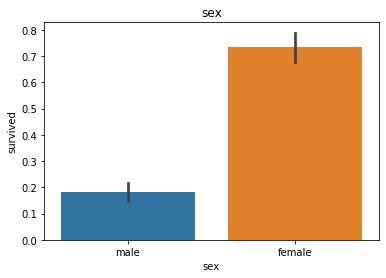

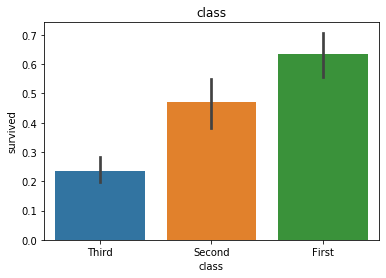

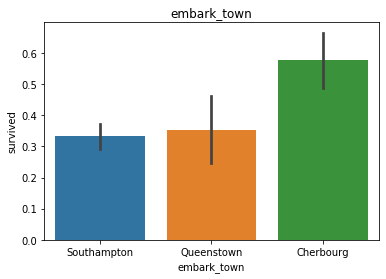

In [35]:
for column in titanic.select_dtypes(object).columns.tolist():
    if len(titanic[column].unique()) <= 5:
        sns.barplot(column, 'survived', data=train)
        plt.title(column)
        plt.ylabel('survived')
        plt.show()

In [36]:
def plot_bars(features, target, df):
    for column in df[features].select_dtypes(object).columns.tolist():
        if len(titanic[column].unique()) <= 5:
            sns.barplot(column, target, data=df)
            plt.title(column)
            plt.ylabel(target)
            plt.show()

### plot violin functions of continuous distribution across discrete bounds

In [37]:
def plot_violin(features, target, df):
    for descrete in df[features].select_dtypes([object,int]).columns.tolist():
        if df[descrete].nunique() <= 5:
            for continous in df[features].select_dtypes(float).columns.tolist():
                sns.violinplot(descrete, continous, hue=target,
                data=df, split=True, palette=['blue','orange'])
                plt.title(continous + 'x' + descrete)
                plt.ylabel(continous)
                plt.show()

### 1) Split data into train (70%) & test (30%) samples.



In [38]:
iris_df = acq.get_iris_data()
iris = prep_iris(iris_df)
train, test = ss.split_my_data(iris, train_pct = .70)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,2
136,6.3,3.4,5.6,2.4,2
53,5.5,2.3,4.0,1.3,1
19,5.1,3.8,1.5,0.3,0
38,4.4,3.0,1.3,0.2,0


### 2) Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

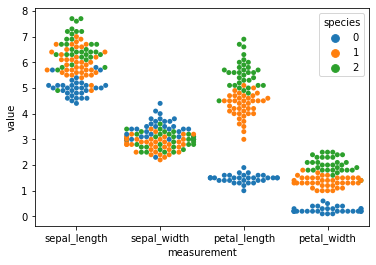

In [39]:
#get features and target list
target = 'species'
features = [i for i in iris.columns.tolist() if i != target]

train_melt = pd.melt(train, target, var_name = 'measurement')
sns.swarmplot(x = 'measurement', y = 'value', hue = target, data = train_melt)

### 3) Create 4 subplots (2 rows x 2 columns) of scatterplots

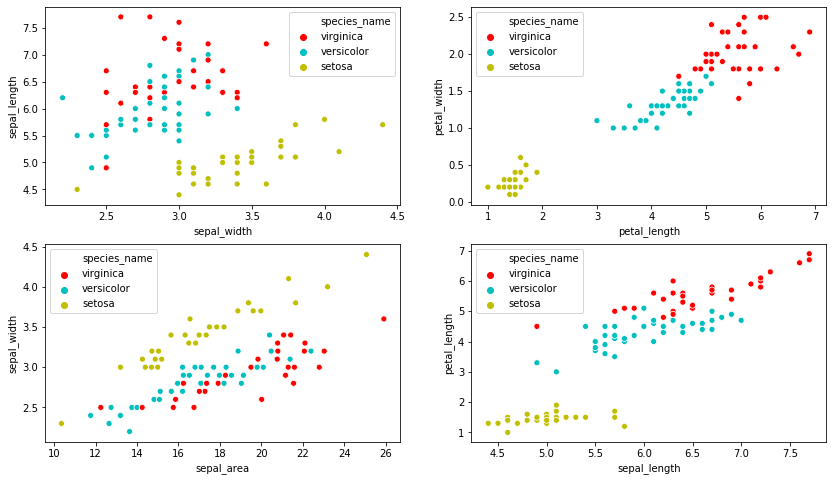

In [40]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train['species_name'] = encoder_spec.inverse_transform(train.species)
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
#sepal_length x sepal_width 
sns.scatterplot(y = 'sepal_length', x = 'sepal_width', ax = ax[0,0], hue = 'species_name', data = train, palette=["r", "c", "y"]) 
#petal_length x petal_width
sns.scatterplot('petal_length', 'petal_width', ax = ax[0,1], hue = 'species_name', data = train, palette=["r", "c", "y"]) 
#sepal_area x petal_area
sns.scatterplot('sepal_area', 'sepal_width', ax = ax[1,0], hue = 'species_name', data = train, palette=["r", "c", "y"]) 
#sepal_length x petal_length
sns.scatterplot('sepal_length', 'petal_length', ax = ax[1,1], hue = 'species_name', data = train, palette=["r", "c", "y"])
#Make your figure size 14 x 8. What are your takeaways?
# ~yes

### 4) Create a heatmap of each variable layering correlation coefficient on top.

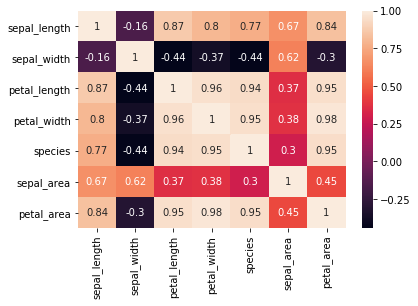

In [41]:
sns.heatmap(train.corr(), annot=True)

### 5) Create a scatter matrix visualizing the interaction of each variable

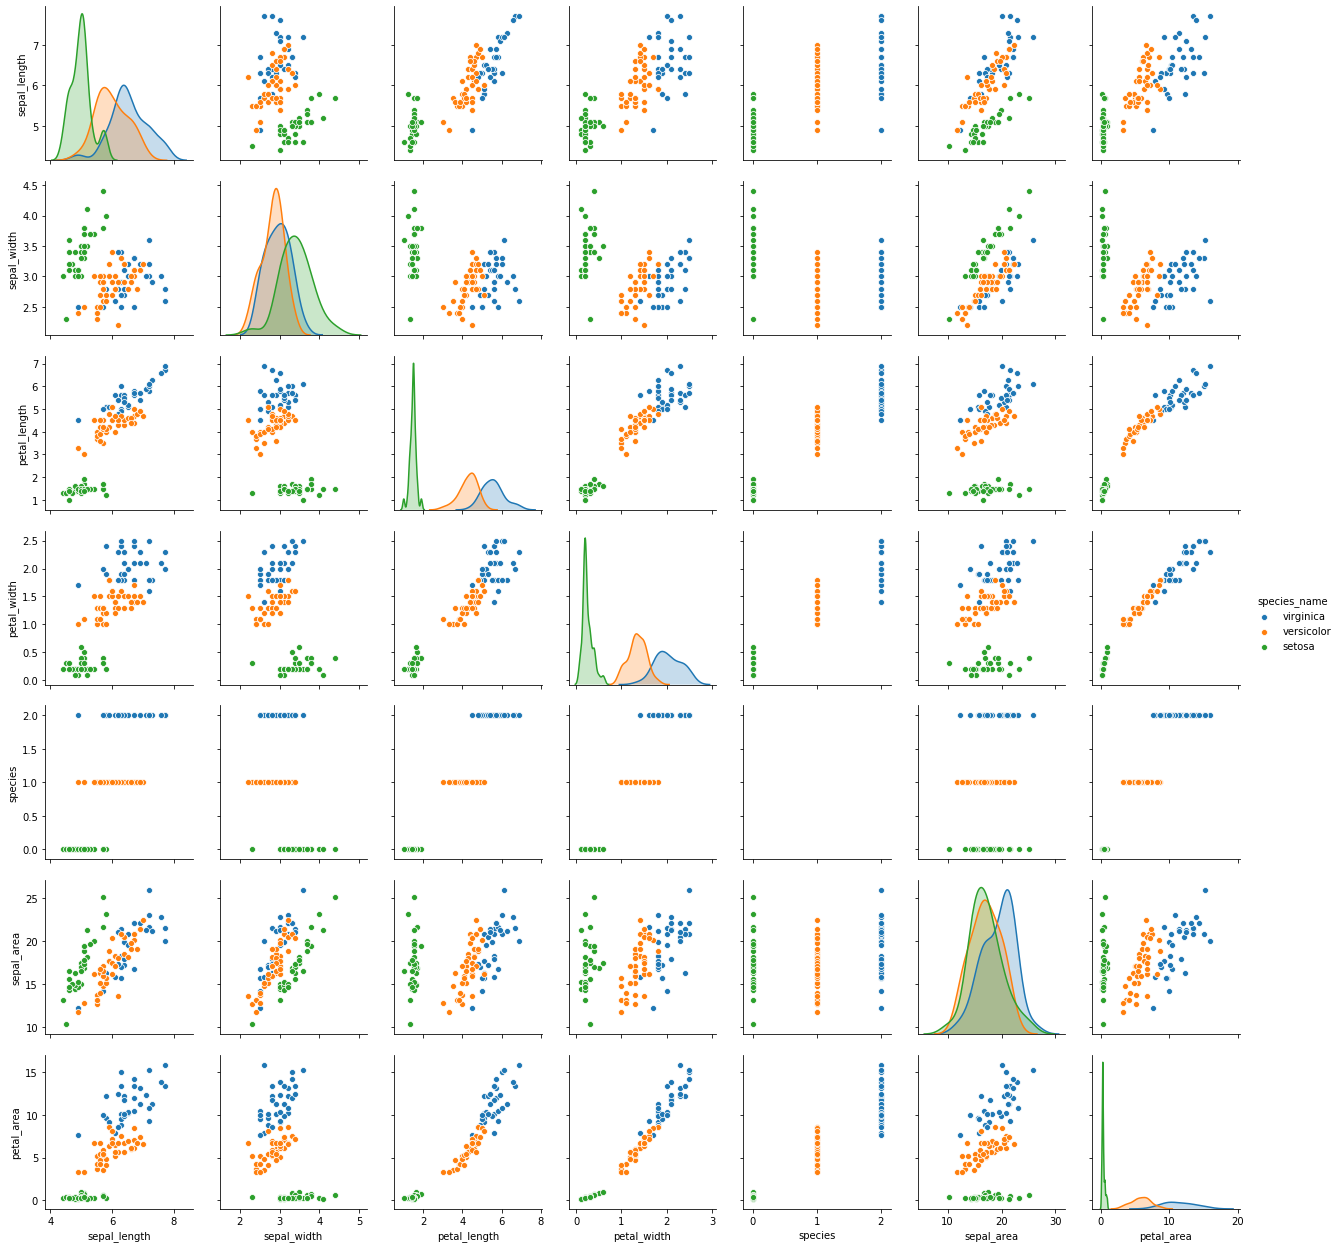

In [48]:
sns.pairplot(train, hue='species_name')

### 6) Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

- must include null hypothesis, alternative hypothesis, t-test, results, summary
- $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
- $H_a$: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed.

In [47]:
import scipy as sp
sp.stats.ttest_ind(
train[train.species_name == 'virginica'].sepal_length,
train[train.species_name == 'versicolor'].sepal_length
)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

# IV. Modeling

### 1) Logistic Regression

In [50]:
iris_raw = acq.get_iris_data()
iris = prep_iris(iris_raw)

In [60]:
train, test = ss.split_my_data(iris, stratify=iris.species)

target = 'species'
features = iris.columns.tolist()
features.remove(target)

features, target

(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 'species')

1) Fit the logistic regression classifier to your training sample and transform, i.e. make predictions on the training sample

In [62]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(train[features], train[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
logit.coef_

array([[ 0.39791797,  1.39699847, -2.16950785, -0.98664247],
       [ 0.24396499, -1.30986823,  0.5671596 , -1.18184773],
       [-1.38591374, -1.74658448,  2.27794311,  2.25446307]])

In [64]:
logit.intercept_

array([ 0.247947  ,  1.02568158, -1.14100698])

In [66]:
predicted = logit.predict(train[features])
predicted

array([1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1,
       1, 1, 0, 1, 0, 0, 2, 2, 0, 1])

2) Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [74]:
logit.score(train[features], train[target])

0.9666666666666667

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train[target], predicted)

array([[40,  0,  0],
       [ 0, 36,  4],
       [ 0,  0, 40]])

In [77]:
from sklearn.metrics import classification_report

print(classification_report(train[target], predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.90      0.95        40
           2       0.91      1.00      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [79]:
true_positive = 
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(train[features], train[target])))
print(f'True Positive Rate: {}')

Accuracy of Logistic Regression classifier on training set: 0.97
